# Plotting COVID-19 Evolution

In [1]:
import pandas as pd

import numpy as np 

import matplotlib.pyplot as plt

import os

## CSSE at Johns Hopkins University Datasets
Reference: https://github.com/CSSEGISandData

### Links

In [2]:
links = {'Notifications': 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
         'Deaths': 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',
         'Recupeartions': 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'}

### Preprocessing

In [3]:
df_dict = {}
for link_key in links.keys():
    df = pd.read_csv(links[link_key])
    df.drop(['Province/State', 'Lat', 'Long'], axis = 1, inplace=True)
    df.set_index('Country/Region', inplace=True)
    df = df.T
    df = df.groupby(level=0, axis=1).sum()
    df_dict[link_key] = df

In [4]:
df_dict['Deaths']

Country/Region  Afghanistan  Albania  Algeria  Andorra  Angola  \
1/22/20                   0        0        0        0       0   
1/23/20                   0        0        0        0       0   
1/24/20                   0        0        0        0       0   
1/25/20                   0        0        0        0       0   
1/26/20                   0        0        0        0       0   
...                     ...      ...      ...      ...     ...   
5/13/20                 132       31      522       49       2   
5/14/20                 136       31      529       49       2   
5/15/20                 153       31      536       49       2   
5/16/20                 168       31      542       51       2   
5/17/20                 169       31      548       51       2   

Country/Region  Antigua and Barbuda  Argentina  Armenia  Australia  Austria  \
1/22/20                           0          0        0          0        0   
1/23/20                           0          0        0          0        0   
1/24/20                           0          0        0          0        0   
1/25/20                           0          0        0          0        0   
1/26/20                           0          0        0          0        0   
...                             ...        ...      ...        ...      ...   
5/13/20                           3        329       48         98      624   
5/14/20                           3        353       49         98      626   
5/15/20                           3        356       52         98      628   
5/16/20                           3        363       55         98      629   
5/17/20                           3        373       60         99      629   

Country/Region  ...  United Kingdom  Uruguay  Uzbekistan  Venezuela  Vietnam  \
1/22/20         ...               0        0           0          0        0   
1/23/20         ...               0        0           0          0        0   
1/24/20         ...               0        0           0          0        0   
1/25/20         ...               0        0           0          0        0   
1/26/20         ...               0        0           0          0        0   
...             ...             ...      ...         ...        ...      ...   
5/13/20         ...           33264       19          11         10        0   
5/14/20         ...           33693       19          11         10        0   
5/15/20         ...           34078       19          11         10        0   
5/16/20         ...           34546       19          11         10        0   
5/17/20         ...           34716       20          12         10        0   

Country/Region  West Bank and Gaza  Western Sahara  Yemen  Zambia  Zimbabwe  
1/22/20                          0               0      0       0         0  
1/23/20                          0               0      0       0         0  
1/24/20                          0               0      0       0         0  
1/25/20                          0               0      0       0         0  
1/26/20                          0               0      0       0         0  
...                            ...             ...    ...     ...       ...  
5/13/20                          2               0     12       7         4  
5/14/20                          2               0     12       7         4  
5/15/20                          2               0     15       7         4  
5/16/20                          2               0     18       7         4  
5/17/20                          2               0     20       7         4  

[117 rows x 188 columns]

## Chosen Countries

### Population per million
Reference: https://www.worldometers.info/world-population

In [5]:
population_per_million = {'Brazil': 212.374697, 'Italy': 60.472582, 'US': 330.765729,
                          'China': 1438.647008, 'Argentina': 45.145011, 'Sweden': 10.091585}

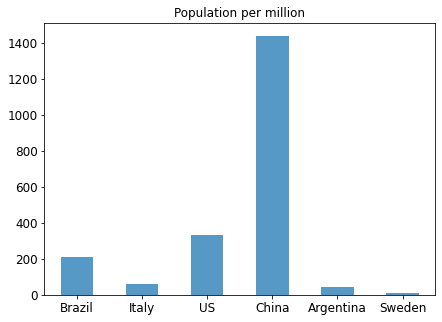

In [6]:
pd.Series(population_per_million).plot(kind='bar', figsize=(7,5), title=f'Population per million', fontsize=12, rot=0, alpha=0.75)

### Area  ($km^2$)  per million
Reference: https://www.google.com

In [7]:
areaKm2_per_million = {'Brazil': 8.516000 , 'Italy': 0.301338, 'US': 9.834000, 
                       'China': 9.597000, 'Argentina': 2.780000, 'Sweden': 0.450295}

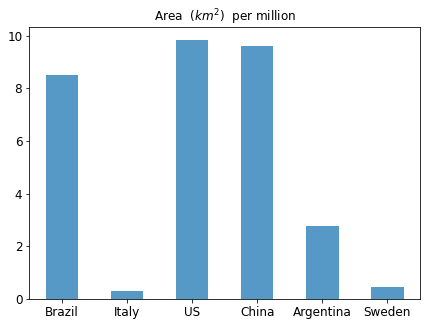

In [8]:
pd.Series(areaKm2_per_million).plot(kind='bar', figsize=(7,5), title=f'Area  ($km^2$)  per million', fontsize=12, rot=0, alpha=0.75)

### Demographic density

In [9]:
density = {key:population_per_million[key]/areaKm2_per_million[key] for key in population_per_million.keys()}
density

{'Brazil': 24.9383157585721,
 'Italy': 200.68023946531804,
 'US': 33.63491244661379,
 'China': 149.90590892987393,
 'Argentina': 16.23921258992806,
 'Sweden': 22.411052754305512}

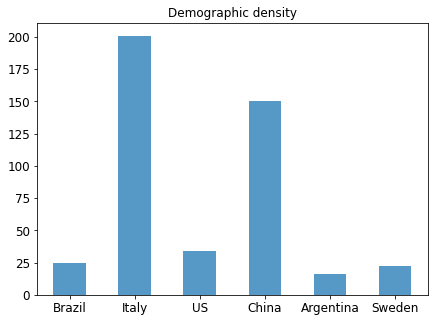

In [10]:
pd.Series(density).plot(kind='bar', figsize=(7,5), title=f'Demographic density', fontsize=12, rot=0, alpha=0.75)

## Plotting normalized datasets by Population Density

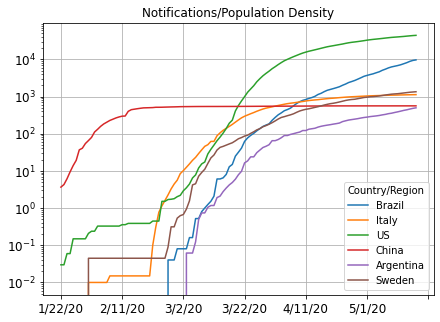

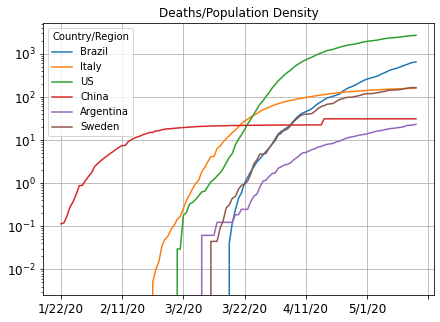

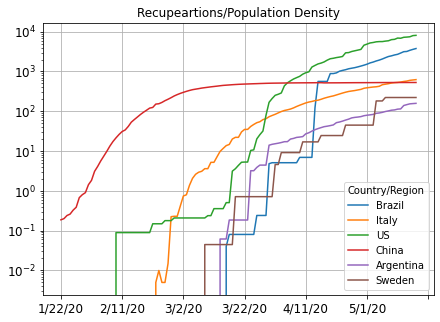

In [11]:
for df_key in df_dict.keys():
    plt.Figure()
    (df_dict[df_key][population_per_million.keys()]/list(density.values())).plot(
                                                        figsize=(7,5), 
                                                        logy=True, 
                                                        title=f'{df_key}/Population Density', 
                                                        grid=True,
                                                        fontsize=12)
    
    try:
        plt.savefig(f'results_world/{df_key}_normalized_density.png', transparent=True)
    except:
        os.system('mkdir results_world')
        plt.savefig(f'results_world/{df_key}_normalized_density.png', transparent=True)
        
    plt.show()

## Plotting normalized datasets by Population per million

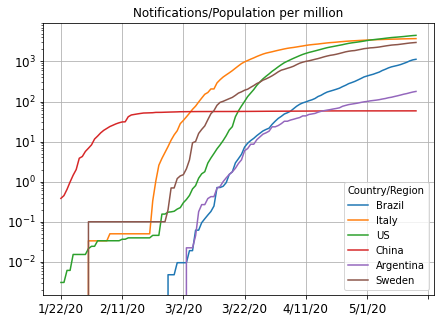

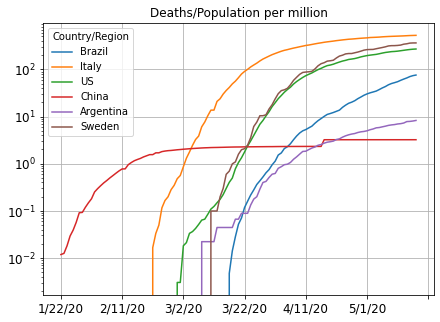

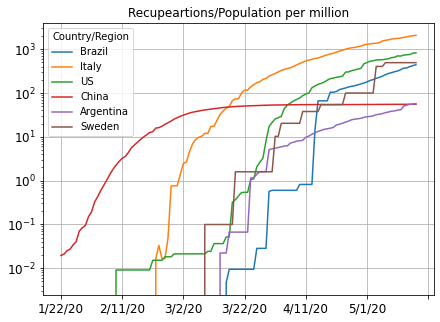

In [12]:
for df_key in df_dict.keys():
    plt.Figure()
    (df_dict[df_key][population_per_million.keys()]/list(population_per_million.values())).plot(
                                                        figsize=(7,5), 
                                                        logy=True, 
                                                        title=f'{df_key}/Population per million', 
                                                        grid=True,
                                                        fontsize=12)
    
    try:
        plt.savefig(f'results_world/{df_key}_normalized_population.png', transparent=True)
    except:
        os.system('mkdir results_world')
        plt.savefig(f'results_world/{df_key}_normalized_population.png', transparent=True)
        
    plt.show()

## Plotting unnormalized datasets

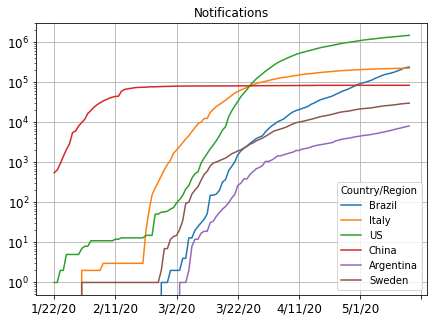

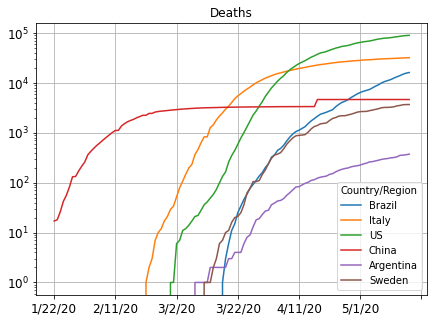

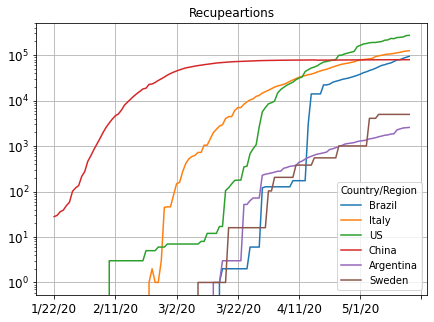

In [13]:
for df_key in df_dict.keys():
    plt.Figure()
    df_dict[df_key][population_per_million.keys()].plot(
                                                        figsize=(7,5), 
                                                        logy=True, 
                                                        title=f'{df_key}', 
                                                        grid=True,
                                                        fontsize=12)
    
    try:
        plt.savefig(f'results_world/{df_key}.png', transparent=True)
    except:
        os.system('mkdir results_world')
        plt.savefig(f'results_world/{df_key}.png', transparent=True)

    plt.show()

## Plotting Death Rate (%)

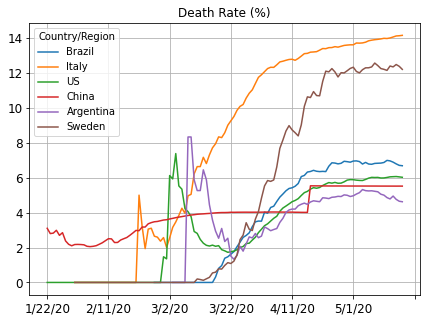

In [14]:
(100*df_dict['Deaths'][population_per_million.keys()]/
 df_dict['Notifications'][population_per_million.keys()]).plot(
                                                                figsize=(7,5), 
                                                                #logy=True, 
                                                                title='Death Rate (%)', 
                                                                grid=True,
                                                                fontsize=12)

try:
    plt.savefig(f'results_world/death_rate.png', transparent=True)
except:
    os.system('mkdir results_world')
    plt.savefig(f'results_world/death_rate.png', transparent=True)
    
plt.show()

# Predicting with Prophet

In [15]:
from fbprophet import Prophet

In [16]:
df_key = 'Notifications'
country = 'US'

df_prophet = pd.DataFrame({'ds': df_dict[df_key].index.values, 'y': df_dict[df_key][country].values})
df_prophet.tail()

ds        y
112  5/13/20  1390406
113  5/14/20  1417774
114  5/15/20  1442824
115  5/16/20  1467820
116  5/17/20  1486757

In [17]:
m = Prophet()
m.fit(df_prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
142 2020-06-12  2.176630e+06  2.096622e+06  2.265437e+06
143 2020-06-13  2.203512e+06  2.119174e+06  2.301455e+06
144 2020-06-14  2.227726e+06  2.138479e+06  2.326840e+06
145 2020-06-15  2.252885e+06  2.158930e+06  2.358804e+06
146 2020-06-16  2.277999e+06  2.181265e+06  2.389117e+06

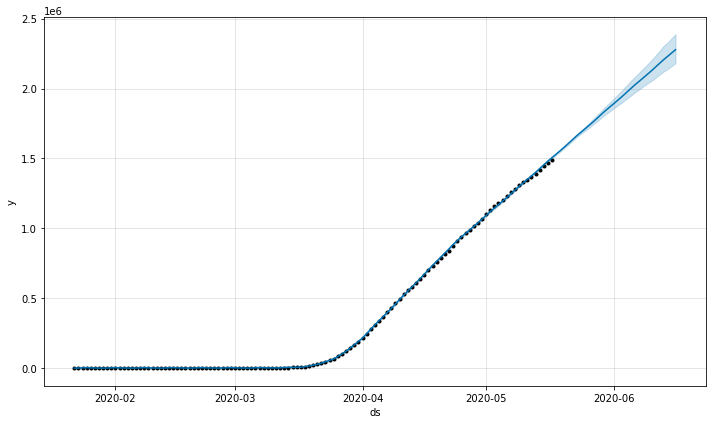

In [19]:
pd.plotting.register_matplotlib_converters()
fig1 = m.plot(forecast)